In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import time
import seaborn as sns
import pandas as pd
#New
from scipy.spatial import distance
import scipy.interpolate as interpolate
from scipy.integrate import quad
#Display
from tqdm.notebook import tqdm
from IPython.display import display, clear_output
#Custom
import embeddings as emb
import utils
import losses
import knn

# Test and compare both

In [14]:
sd = 100 #np.random.randint(0,10e5)
#=Synthetic data
n_systems = 2
n_concepts = 200
noise = 0.001 #0.001
emb_dim = 2
n_epicentres = 1
linearsep = 1
A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)

In [3]:
# def make_df_pair_params(pairs,all_accs_per_pair_params,p1_name='p1',p2_name='p2'):
#     dict_list = []
#     for i,(p1,p2) in enumerate(pairs):
#         vals = all_accs_per_pair_params[i]
#         for val in vals:
#             dict_list.append({p1_name:p1,p2_name:p2,'acc':val})
#     df = pd.DataFrame(dict_list)
#     return df
# def get_best_Ncorr_krad_run_angles(i_iter,X,Y,y_idx_map,Ncorr_test,k_test = None,rad_test = None):
#     dict_run = {}
#     p_test = k_test if k_test is not None else rad_test
#     pairs = list(itertools.product(Ncorr_test,p_test))
#     for Ncorr,p in pairs:
#         clear_output(wait=True)
#         display("Iter %d - Testing Ncorr : %d - param : %.2f ..."%(i_iter,Ncorr,p))
#         time.sleep(0.01)
#         if k_test is not None:
#             D_XY = knn.get_DXY_angles(X,Y,k=p,bplot = False,bPrint = False)
#         elif rad_test is not None:
#             D_XY = knn.get_DXY_angles(X,Y,radius=p,bplot = False,bPrint = False)
#         X_pretrain,Y_pretrain, matches = knn.get_corres_data(X,Y,D_XY,Ncorr)
#         acc , mat = knn.check_corresp(matches,y_idx_map,bPrint = False)
#         dict_run[(Ncorr,p)] = acc
#     return dict_run
# def get_best_Ncorr_krad_params_dist(n_iter,
#                                 n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,
#                                 Ncorr_test,k_test = None,rad_test = None):
#     all_dicts = []
#     p_test = k_test if k_test is not None else rad_test
#     pairs = list(itertools.product(Ncorr_test,p_test))
#     for i_iter in range(n_iter):
#         sd = np.random.randint(0,10e5)
#         A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)
#         dict_run = get_best_Ncorr_krad_run_angles(i_iter,A,B_shuff,B_idx_map,Ncorr_test,k_test = k_test,rad_test = rad_test)
#         all_dicts.append(dict_run)  
#     #Get all_accs_per_Ncorr_krad
#     all_accs_per_Ncorr_krad = []
#     for Ncorr,p in pairs:
#         arr_Ncorr_krad = np.array([d[(Ncorr,p)] for d in all_dicts]) #all values for each k
#         all_accs_per_Ncorr_krad.append(arr_Ncorr_krad)
#     #Get best average
#     avgs = np.array([np.mean(np.array(accs)) for accs in all_accs_per_Ncorr_krad])
#     best_idx = np.argmax(avgs)
#     best_Ncorr_krad = pairs[best_idx] #rad value with highest average
#     best_avg = np.mean(np.array(all_accs_per_Ncorr_krad[best_idx])) #highest average
#     clear_output(wait=True)
#     return best_Ncorr_krad, best_avg , all_accs_per_Ncorr_krad

# Test best rad /k values for these params

## Test Ncorr and param k or rad

#### Ncorr and rad

In [12]:
Ncorr_test = [3,5,10,13]
rad_test = np.around(np.arange(0.05,0.45,0.05), decimals=2)
n_iter = 3
best_Ncorr_krad, best_avg , all_accs_per_Ncorr_krad = knn.get_best_Ncorr_krad_params_dist(n_iter,
                                n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,
                                Ncorr_test,rad_test = rad_test)
print("Best Ncorr / rad : %s - Accuracy : %2f" %(best_Ncorr_krad, best_avg))

Best Ncorr / rad : (3, 0.2) - Accuracy : 1.000000


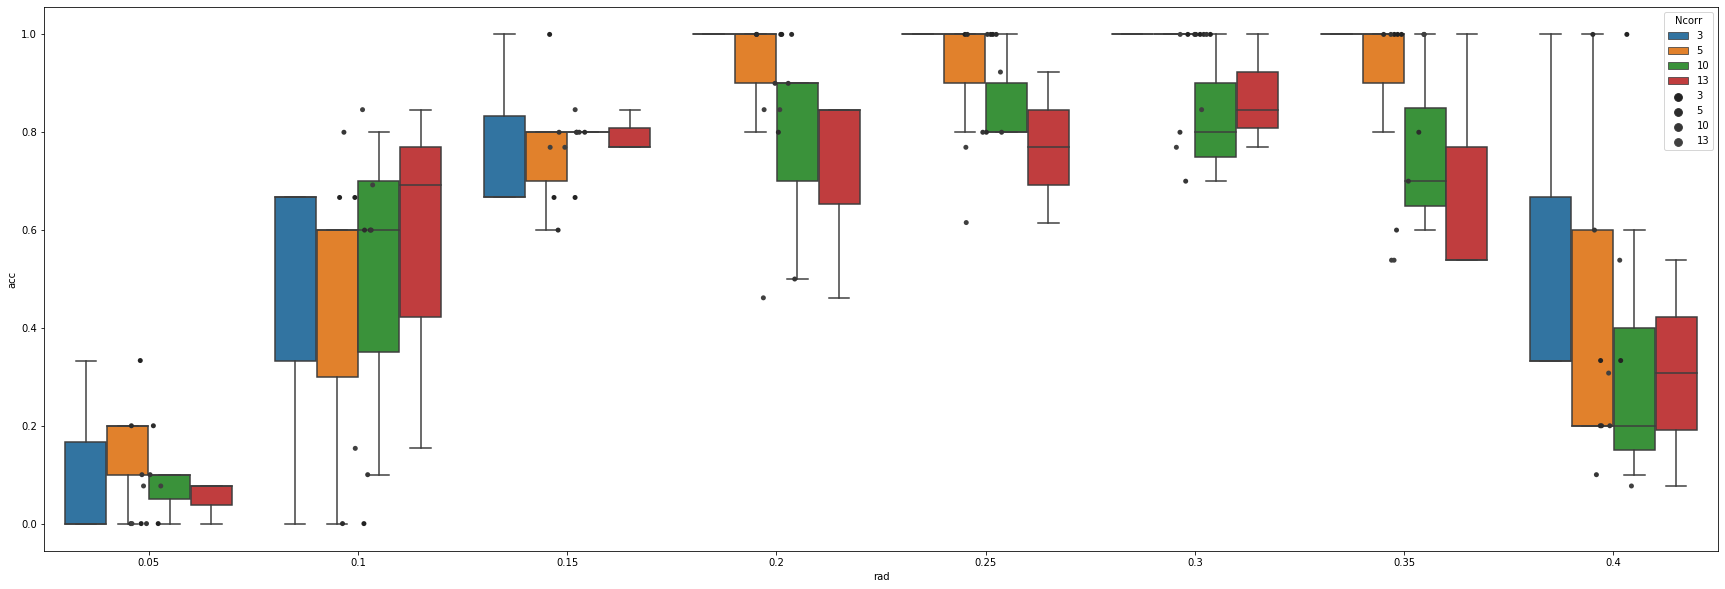

In [16]:
pairs = list(itertools.product(Ncorr_test,rad_test))
df = knn.make_df_pair_params(pairs,all_accs_per_Ncorr_krad,p1_name = 'Ncorr',p2_name ='rad')
fig, ax =  plt.subplots(figsize=(30,10))
sns.boxplot(x='rad', y="acc", hue ='Ncorr', data=df , ax= ax)
sns.stripplot(x="rad", y="acc", hue ='Ncorr', data=df, color=".25", ax= ax)

#### Ncorr and k

In [10]:
Ncorr_test = [3,5,10,13,15]
k_test = np.arange(4,16,1)
n_iter = 10
best_Ncorr_krad, best_avg , all_accs_per_Ncorr_krad = knn.get_best_Ncorr_krad_params_dist(n_iter,
                                n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,
                                Ncorr_test,k_test = k_test)
print("Best Ncorr / k : %s - Accuracy : %2f" %(best_Ncorr_krad, best_avg))

Best Ncorr / k : (3, 11) - Accuracy : 0.966667


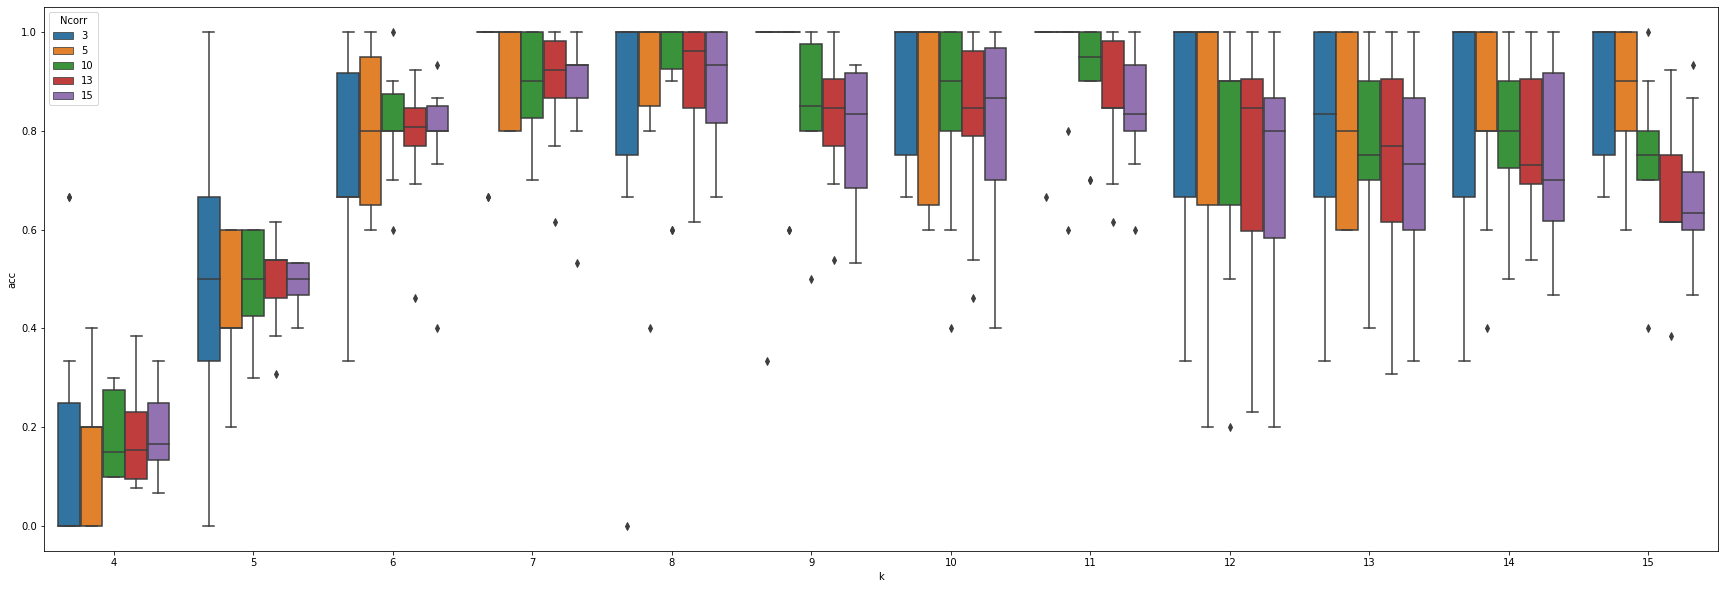

In [11]:
pairs = list(itertools.product(Ncorr_test,k_test))
df = knn.make_df_pair_params(pairs,all_accs_per_Ncorr_krad,p1_name = 'Ncorr',p2_name ='k')
fig, ax =  plt.subplots(figsize=(30,10))
sns.boxplot(x='k', y="acc", hue ='Ncorr', data=df , ax= ax)

## Test param k or rad only - Ncorr fixed

Best radius : 0.20 - Accuracy : 1.000000


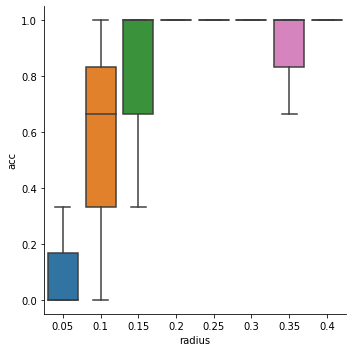

In [9]:
Ncorr = 3
rad_test = np.around(np.arange(0.05,0.45,0.05), decimals=2)
n_iter = 3
best_rad, best_avg , all_accs_per_rad = knn.get_best_krad_param_angles(n_iter,Ncorr,
                                                                   n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,
                                                                   rad_test = rad_test)
print("Best radius : %.2f - Accuracy : %2f" %(best_rad, best_avg))
#==PLOT
df= utils.sns_cat_data_to_df(rad_test,all_accs_per_rad,cat_name='radius',val_name = 'acc')
sns.catplot(x='radius', y='acc', kind="box", data=df)

In [34]:
k_test = np.concatenate((np.arange(5,25,5),np.arange(20,210,10)))
print(k_test)

[  5  10  15  20  20  30  40  50  60  70  80  90 100 110 120 130 140 150
 160 170 180 190 200]


Best k : 70 - Accuracy : 0.560000


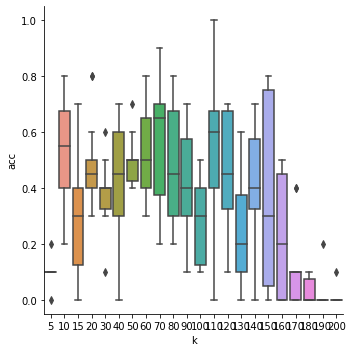

In [35]:
Ncorr = 10
k_test = np.concatenate((np.arange(5,25,5),np.arange(20,210,10)))
n_iter = 10
best_k, best_avg , all_accs_per_k = knn.get_best_krad_param_angles(n_iter,Ncorr,
                                                                   n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,
                                                                   k_test = k_test)
print("Best k : %d - Accuracy : %2f" %(best_k, best_avg))
df= utils.sns_cat_data_to_df(k_test,all_accs_per_k,cat_name='k',val_name = 'acc')
sns.catplot(x="k", y="acc", kind="box", data=df)

([<matplotlib.axis.XTick at 0x1a3bb76f10>,
 <a list of 21 Text xticklabel objects>)

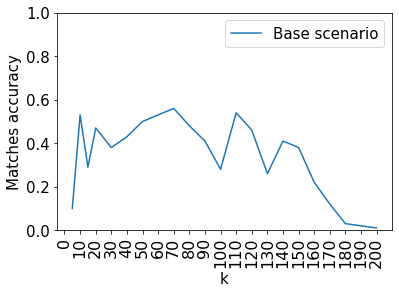

In [38]:
# df= utils.sns_cat_data_to_df(k_test,all_accs_per_k,cat_name='k',val_name = 'acc')
# sns.catplot(x="k", y="acc", kind="box", data=df)
avgs = np.mean(all_accs_per_k,axis = 1)
fig,ax = plt.subplots()
ax.set_ylim(0,1)
ax.plot(k_test,avgs,label='Base scenario')
ax.set_xlabel('k',fontsize = 15)
ax.set_ylabel('Matches accuracy',fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize = 15)
plt.xticks(np.arange(0,210,10),rotation=90,fontsize = 16)

# 1) Test k

In [9]:
k = 60
Ncorr = 10

In [10]:
start = time.time()
D_XY = knn.get_DXY_angles(A,B_shuff,k=k,bplot = False)
X_pretrain,Y_pretrain, matches = knn.get_corres_data(A,B_shuff,D_XY,Ncorr)
acc , mat = knn.check_corresp(matches,B_idx_map)
print(acc)
print(mat)
print(X_pretrain.shape,Y_pretrain.shape)
end = time.time()
print("Took : %.2f s"%(end-start))

InvalidArgumentError: input must have at least k columns. Had 50, needed 60 [Op:TopKV2]

## Testing bits

In [13]:
D_A, I_A = knn.get_topk(A,k)
PD_X = pairwise_dist(A)

InvalidArgumentError: input must have at least k columns. Had 50, needed 60 [Op:TopKV2]

In [11]:
Ri , Ri_idx = knn.get_Ris(A,k)
normals = knn.get_normals(Ri , Ri_idx,k = k)
f1s,f2s,f3s = knn.get_features(A,normals)
all_pairs_feat,all_pairs_idx = knn.get_feat_all_pairs((f1s,f2s,f3s))
pairs = knn.get_pairs(Ri_idx,k = k)
i = 13
feat_i = knn.get_feat_i(i,pairs,all_pairs_idx,all_pairs_feat)
thresh_i = np.mean(feat_i,axis = 0) 
feat_vec_i = knn.get_feat_vec_i(feat_i,thresh_i)
print(feat_vec_i)

InvalidArgumentError: input must have at least k columns. Had 50, needed 60 [Op:TopKV2]

In [10]:
start = time.time()
feat_A = knn.get_X_feat_angles(A,k=k)
print(feat_A.shape)
end = time.time()
print("Took : %.2f s"%(end-start))

(200, 8)
Took : 0.22 s


# Test radius

In [11]:
rad = 0.2
Ncorr = 10

In [12]:
pad_D = True
start = time.time()
D_XY = knn.get_DXY_angles(A,B_shuff,radius=rad,bpad = pad_D,bplot = False)
X_pretrain,Y_pretrain, matches = knn.get_corres_data(A,B_shuff,D_XY,Ncorr)
acc , mat = knn.check_corresp(matches,B_idx_map)
print(acc)
print(mat)
print(X_pretrain.shape,Y_pretrain.shape)
end = time.time()
print("Took : %.2f s"%(end-start))

10 right over 10 tot
1.0
[[109 197 197]
 [168 180 180]
 [139 138 138]
 [ 50  47  47]
 [187  11  11]
 [  9 157 157]
 [ 95  91  91]
 [ 48 145 145]
 [ 74  84  84]
 [128   5   5]]
(10, 2) (10, 2)
Took : 3.66 s


In [13]:
pad_D = False
start = time.time()
D_XY = knn.get_DXY_angles(A,B_shuff,radius=rad,bpad = pad_D,bplot = False)
X_pretrain,Y_pretrain, matches = knn.get_corres_data(A,B_shuff,D_XY,Ncorr)
acc , mat = knn.check_corresp(matches,B_idx_map)
print(acc)
print(mat)
print(X_pretrain.shape,Y_pretrain.shape)
end = time.time()
print("Took : %.2f s"%(end-start))

10 right over 10 tot
1.0
[[150  20  20]
 [109 197 197]
 [168 180 180]
 [139 138 138]
 [ 50  47  47]
 [187  11  11]
 [  9 157 157]
 [ 95  91  91]
 [ 74  84  84]
 [ 48 145 145]]
(10, 2) (10, 2)
Took : 3.36 s


## Testing bits

In [14]:
feat_A = knn.get_X_feat_angles(A,radius=rad)
feat_B = knn.get_X_feat_angles(B_shuff,radius=rad)
idx_pad,n_pad = knn.pts_no_knn(feat_A)
print(n_pad)

1


(200, 8)
[ 414.  889. 1757. 1021.  888.  647. 1820. 3442.]
[ 436.  674. 1729. 1070.  787.  759. 1829. 3301.]
Took : 3.60 s
[[ 392.  843. 1732. ...  629. 1761. 3387.]
 [ 404.  800. 1615. ...  562. 1526. 2973.]
 [ 378.  702. 1680. ...  764. 1696. 3519.]
 ...
 [  60.  169.  495. ...  181.  221.  848.]
 [ 312.  666. 1247. ...  819. 1568. 3000.]
 [ 474.  892. 1786. ...  902. 1996. 3780.]]


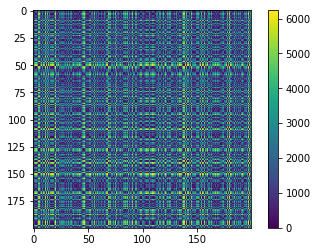

In [15]:
start = time.time()
feat_A = knn.get_X_feat_angles(A,radius=rad)
feat_B = knn.get_X_feat_angles(B_shuff,radius=rad)
print(feat_A.shape)
print(feat_A[78])
print(feat_B[50])
end = time.time()
print("Took : %.2f s"%(end-start))
# print(np.array([-1]*8))
# idx = knn.get_rows_idx(feat_A,[-1]*8)
# noNN = len(idx)
# print(noNN)
print(feat_A)
D_XY = np.linalg.norm(feat_A[:, None] - feat_B[None, :],axis=(2))
plt.imshow(D_XY)
plt.colorbar()


In [16]:
start = time.time()
Ri , Ri_idx = knn.get_Ris_radius(A,rad)
end = time.time()
print("get R took : %.2f s"%(end-start))

start = time.time()
normals = knn.get_normals(Ri , Ri_idx,radius = rad)
end = time.time()
print("get norm took : %.2f s"%(end-start))

start = time.time()
f1s,f2s,f3s = knn.get_features(A,normals)
end = time.time()
print("get feat took : %.2f s"%(end-start))

start = time.time()
all_pairs_feat,all_pairs_idx = knn.get_feat_all_pairs((f1s,f2s,f3s))
end = time.time()
print("get all took : %.2f s"%(end-start))

start = time.time()
pairs = knn.get_pairs(Ri_idx,radius = rad)
end = time.time()
print("pairs took : %.2f s"%(end-start))

start = time.time()
for i in range(n_concepts):
    #print(len(pairs[i]))
    if len(pairs[i])==0:
        print(i)
#     start = time.time()
    feat_i = np.random.random((15000,3))
    #feat_i = knn.get_feat_i(i,pairs,all_pairs_idx,all_pairs_feat)
#     end = time.time()
#     print("feati took : %.2f s"%(end-start))
# #     start = time.time()
    thresh_i = np.mean(feat_i,axis = 0) 
# #     end = time.time()
# #     print("thresh took : %.2f s"%(end-start))

# #     start = time.time()
    feat_vec_i = knn.get_feat_vec_i(feat_i,thresh_i)
# #     end = time.time()
# #     print("feat_vec took : %.2f s"%(end-start))

#     if i == 121:
#         print(feat_vec_i)

end = time.time()
print("Loop took : %.2f s"%(end-start))

# print(feat_vec_i)

get R took : 0.03 s
get norm took : 0.35 s
get feat took : 0.01 s
get all took : 0.05 s
pairs took : 0.25 s
150
Loop took : 0.42 s


# Test 3 radius

In [17]:
r1 , r2, r3 = 0.1 , 0.3, 0.5
Ncorr = 10

In [18]:
feat_A = knn.get_X_feat_3radius(A,r1,r2,r3)
print(feat_A.shape)

(200, 24)


In [20]:
# 3 RADIUS
start = time.time()
D_XY = knn.get_DXY_angles_3radius(A,B_shuff,r1 , r2, r3,bplot = False)
X_pretrain,Y_pretrain, matches = knn.get_corres_data(A,B_shuff,D_XY,Ncorr)
acc , mat = knn.check_corresp(matches,B_idx_map)
print(acc)
print(mat)
print(X_pretrain.shape,Y_pretrain.shape)
end = time.time()
print("Took : %.2f s"%(end-start))

8 right over 10 tot
0.8
[[ 71 151 151]
 [ 36 123 123]
 [ 74  84  84]
 [ 46  73  73]
 [ 38 120  22]
 [ 38  22  22]
 [161 102 102]
 [177 152 152]
 [  7 183  38]
 [ 95  91  91]]
(10, 2) (10, 2)
Took : 12.96 s
